<a href="https://colab.research.google.com/github/yadgire7/AUDIO-PROCESSING-ML/blob/master/Time_Domian_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:
1. Valerio Velardo
2. The Sound of AI (Youtube)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd

In [2]:
folder_path = "/content/drive/MyDrive/SAIL/sample_audio/"
piano_file = "piano.mp3"
drum_file = "drum.mp3"

In [3]:
# load files
piano, p_sr = librosa.load(os.path.join(folder_path, piano_file))
drum, d_sr= librosa.load(os.path.join(folder_path, drum_file))

In [4]:
piano_player = ipd.Audio(os.path.join(folder_path, piano_file))

In [5]:
piano_player

In [6]:
drum_player = ipd.Audio(os.path.join(folder_path, drum_file))

In [7]:
drum_player

In [8]:
piano

array([ 3.3013523e-05, -1.0190159e-04, -3.3088028e-05, ...,
        5.1850565e-03,  2.2315630e-04, -2.8103613e-04], dtype=float32)

In [9]:
#number of samples in the audio
n_samples = piano.size

In [10]:
n_samples

308720

In [11]:
# sample duration = 1 / sr
p_sd = 1 / p_sr

In [12]:
p_sr
# sample rate of audio

22050

In [13]:
p_sd

4.5351473922902495e-05

In [14]:
# signal duration = no. of smaples * sample duration
p_signal_duration = n_samples * p_sd

In [15]:
p_signal_duration

14.000907029478459

In [22]:
# calculate amplitude envelope
# Amplitude envelope: The maximum amplitude value of all the samples in a frame
FRAME_SIZE = 1024
HOP_LENGTH = 512
def cal_ae(signal, frame_size, hop_size):
    # amp_envelope = []
    # for i in range(0, len(signal), frame_size):
    #     current_ae = max(signal[i:i+frame_size])
    #     amp_envelope.append(current_ae)
    # return np.array(amp_envelope)
    return np.array([max(signal[i:i+frame_size]) for i in range(0,signal.size, hop_size)])


In [23]:
piano_ae = cal_ae(piano, FRAME_SIZE, HOP_LENGTH)
drum_ae = cal_ae(drum, FRAME_SIZE, HOP_LENGTH)

In [24]:
piano_ae

array([0.28485695, 0.28904176, 0.28904176, 0.25222373, 0.20404439,
       0.1926865 , 0.1662846 , 0.14426878, 0.12904997, 0.10251475,
       0.09128828, 0.08034866, 0.06484249, 0.06484249, 0.05384428,
       0.04249959, 0.2842006 , 0.32152298, 0.33237043, 0.33237043,
       0.27903214, 0.25730777, 0.24106789, 0.16575505, 0.23544994,
       0.25685123, 0.25685123, 0.22499941, 0.2090408 , 0.13856049,
       0.20947793, 0.24100354, 0.27293098, 0.27293098, 0.26290104,
       0.25722298, 0.15040603, 0.15035495, 0.12277026, 0.11871953,
       0.13369942, 0.13369942, 0.12337244, 0.10759564, 0.10759564,
       0.13420227, 0.24155706, 0.24155706, 0.26738137, 0.32647544,
       0.32647544, 0.30544215, 0.3111305 , 0.3271155 , 0.3271155 ,
       0.27702263, 0.19751492, 0.2684337 , 0.34789437, 0.34789437,
       0.32676157, 0.30517262, 0.25731266, 0.25609162, 0.32084116,
       0.32761958, 0.337204  , 0.337204  , 0.31655547, 0.24626845,
       0.13930024, 0.3801915 , 0.39706987, 0.4611414 , 0.46114

(-1.0, 1.0)

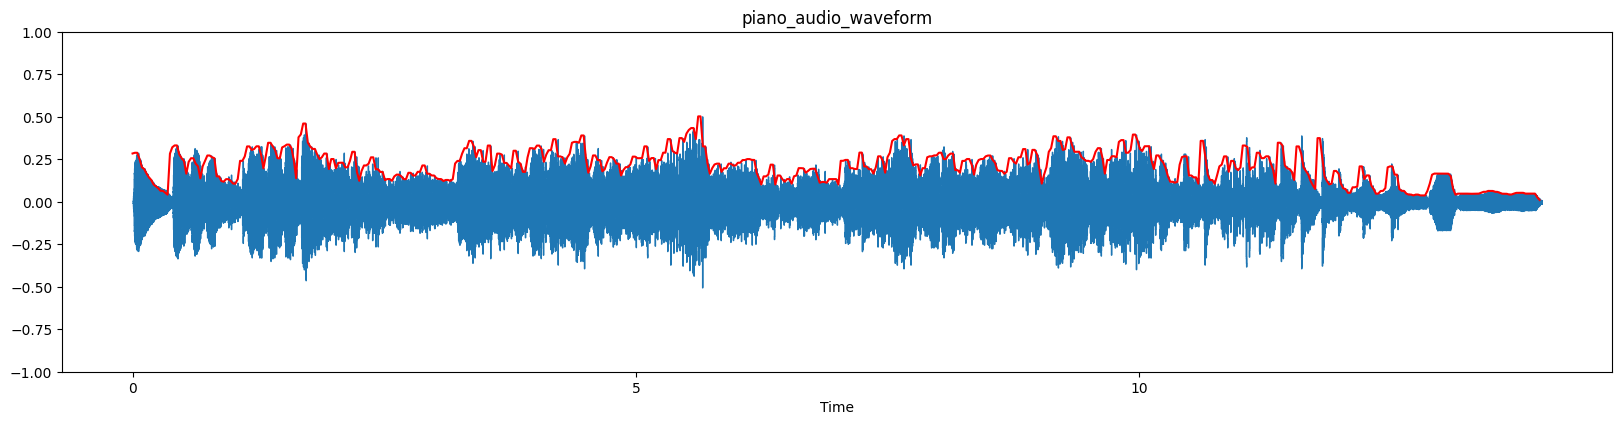

In [27]:
frames = range(0, piano_ae.size)
t = librosa.frames_to_time(frames, hop_length= HOP_LENGTH)

plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
librosa.display.waveshow(piano)
plt.plot(t, piano_ae, color = "r")
plt.title("piano_audio_waveform")
plt.ylim((-1,1))



(-1.0, 1.0)

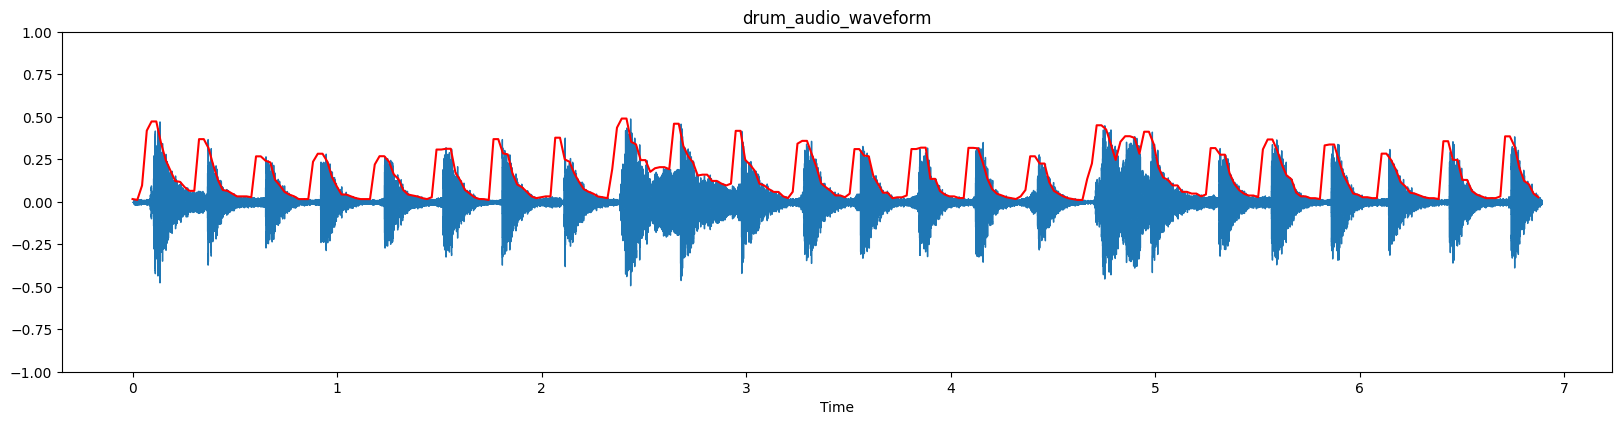

In [30]:
frames = range(0, drum_ae.size)
t = librosa.frames_to_time(frames, hop_length= HOP_LENGTH)

plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
librosa.display.waveshow(drum)
plt.plot(t, drum_ae, color = "r")
plt.title("drum_audio_waveform")
plt.ylim((-1,1))